In [352]:
import pandas as pd
import numpy as np
from pylab import *

In [353]:
colnames = ["Wall time","Step","Value"]
data1 = pd.read_csv("time_stamp.csv")
r1 = data1.Value.rolling(window=10)
r2 = data1.Value.rolling(window=1)
print(type(data1.Value))

<class 'pandas.core.series.Series'>


In [354]:
data2 = pd.read_csv("rewards.csv")
r3 = data2.Value.rolling(window=40)
r4 = data2.Value.rolling(window=7)
# print(data.Value)

In [355]:
x1 = np.array(data1.Step.to_list())
y1 = np.array(r1.mean().to_list())
y2 = np.array(r2.mean().to_list())

x2 = np.array(data2.Step.to_list())
y3 = np.array(r3.mean().to_list())
y4 = np.array(r4.mean().to_list())
# print(y3)

In [356]:
def perc(data):
   median = np.zeros(data.shape[1])
   perc_25 = np.zeros(data.shape[1])
   perc_75 = np.zeros(data.shape[1])
   for i in range(0, len(median)):
       median[i] = np.median(data[:i])
       perc_25[i] = np.percentile(a=data[:,i], q=25)
       perc_75[i] = np.percentile(a=data[:,i], q=75)
   return median, perc_25, perc_75

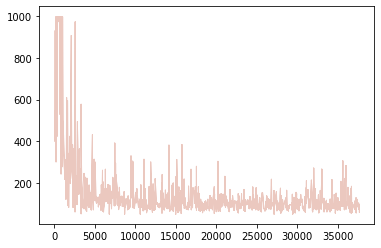

In [357]:
med_low_mut, perc_25_low_mut, perc_75_low_mut = perc(np.array([data1.Value.to_list()]))
fill_between(x1, perc_25_low_mut, perc_75_low_mut, alpha=0.25, linewidth=1, color='#B22400')

-0.021618962287902832 0.05584076046943665


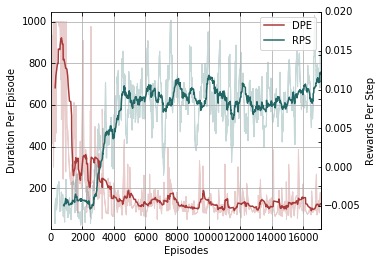

In [358]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
host = host_subplot(111, axes_class=AA.Axes)
subplots_adjust(right=0.75)


# axes(frameon=0)
grid()

par1 = host.twinx()
par2 = host.twinx()

par1.axis["right"].toggle(all=True)

# offset = 60
# new_fixed_axis = par2.get_grid_helper().new_fixed_axis
# par2.axis["right"] = new_fixed_axis(loc="right",
#                                     axes=par2,
#                                     offset=(offset, 0))

# par2.axis["right"].toggle(all=True)

host.set_xlabel("Episodes")
host.set_ylabel("Duration Per Episode")
host.set_xlim(0,x2[-1])
par1.set_ylabel("Rewards Per Step")
p1, = host.plot(x1, y1,"#AA3939",label="DPE")
p2, = par1.plot(x2, y3,"#226666",label="RPS")

# print(y3)
print(data2.Value.min(), data2.Value.max())
par1.set_ylim(-8e-3, 0.020)
host.legend()

# host.axis["left"].label.set_color(p1.get_color())
# par1.axis["right"].label.set_color(p2.get_color())
# par2.axis["right"].label.set_color(p3.get_color())


# host.fill_between(x1, y1, y2, where=y2 >y1, color=p1.get_color(), alpha=0.2)
# host.fill_between(x1, y1, y2, where=y2 <=y1, color=p1.get_color(), alpha=0.2)
# par1.fill_between(x2, y3, y4, where=y3 >y4, color=p2.get_color(), alpha=0.2)
# par1.fill_between(x2, y3, y4, where=y3 <=y4, color=p2.get_color(), alpha=0.2)

med_low_mut, perc_25_low_mut, perc_75_low_mut = perc(np.array([data1.Value.to_list()]))
host.fill_between(x1, perc_25_low_mut, perc_75_low_mut, alpha=0.25, linewidth=1, color=p1.get_color())
med_low_mut, perc_25_low_mut, perc_75_low_mut = perc(np.array([y4]))
par1.fill_between(x2, perc_25_low_mut, perc_75_low_mut, alpha=0.25, linewidth=1, color=p2.get_color())
draw()
show()